# EDA

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
from statsmodels import robust
import seaborn as sns
import matplotlib.cm as cm

## mean, median and trim_mean

In [2]:
state = pd.read_csv('state.csv')

In [3]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [4]:
state.loc[:,'Population'].mean()

6162876.3

In [5]:
state.loc[:,'Population'].median()

4436369.5

In [6]:
stats.trim_mean(state.loc[:,'Population'], proportiontocut=0.1)

4783697.125

# weighted mean

In [7]:
# murder rate
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [8]:
np.round(np.average(state['Murder.Rate'], weights=state['Population']), decimals=3)

4.446

## weighted median

In [9]:
import wquantiles

In [10]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

In [11]:
array = np.array([13,23,54])
weight = np.array([10,3,4])

In [12]:
wquantiles.median(array, weight)

18.384615384615383

In [13]:
(13+23)/2

18.0

In [14]:
array = np.array([133,135,137,139,141])
weight = np.array([57,62,33,76,78])
wquantiles.median(array, weight)

137.6422018348624

## std, percentle, IQR, MAD

In [15]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [16]:
state['Population'].std()

6848235.347401142

In [17]:
state['Population'].quantile(0.25)

1833004.25

In [18]:
# IQR Interquartile range
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [19]:
# MAD median absolute deviation from the median
robust.scale.mad(state['Population'])

3849876.1459979336

- percentiles: 1,2,3...100
- quartiles: 25th, 50th, 75th percentiles
- deciles: 10th, 20th... percentiles

In [20]:
# percentiles of murder rate by state
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

## Boxplot

In [21]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


<Axes: >

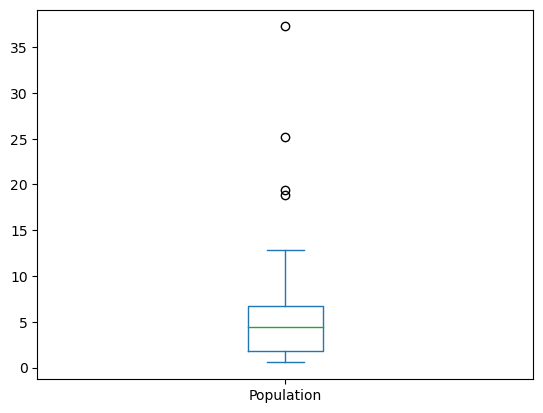

In [22]:
(state['Population']/1000000).plot.box()

Text(0, 0.5, 'Population (millions)')

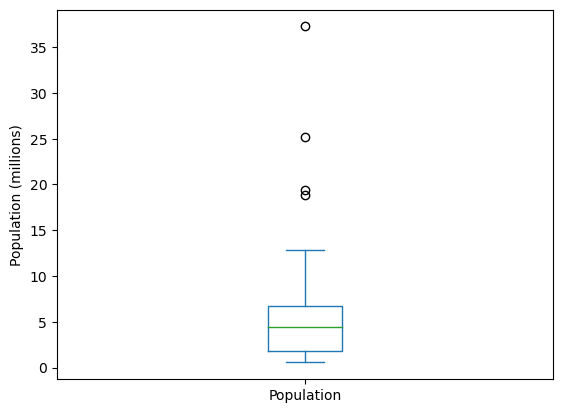

In [23]:
ax = (state['Population']/1000000).plot.box()
ax.set_ylabel('Population (millions)')

In [24]:
(state['Population']/1000000).quantile([0.25, 0.5, 0.75])

0.25    1.833004
0.50    4.436369
0.75    6.680312
Name: Population, dtype: float64

In [25]:
state.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


- skewness: $$\frac{\mu-\nu}{\sigma}$$
where $\mu$ is the mean, $\nu$ is median and $\sigma$ is std

## Frequency table

In [26]:
state['Population']

0      4779736
1       710231
2      6392017
3      2915918
4     37253956
5      5029196
6      3574097
7       897934
8     18801310
9      9687653
10     1360301
11     1567582
12    12830632
13     6483802
14     3046355
15     2853118
16     4339367
17     4533372
18     1328361
19     5773552
20     6547629
21     9883640
22     5303925
23     2967297
24     5988927
25      989415
26     1826341
27     2700551
28     1316470
29     8791894
30     2059179
31    19378102
32     9535483
33      672591
34    11536504
35     3751351
36     3831074
37    12702379
38     1052567
39     4625364
40      814180
41     6346105
42    25145561
43     2763885
44      625741
45     8001024
46     6724540
47     1852994
48     5686986
49      563626
Name: Population, dtype: int64

In [27]:
state['Population'].sort_values()

49      563626
44      625741
33      672591
1       710231
40      814180
7       897934
25      989415
38     1052567
28     1316470
18     1328361
10     1360301
11     1567582
26     1826341
47     1852994
30     2059179
27     2700551
43     2763885
15     2853118
3      2915918
23     2967297
14     3046355
6      3574097
35     3751351
36     3831074
16     4339367
17     4533372
39     4625364
0      4779736
5      5029196
22     5303925
48     5686986
19     5773552
24     5988927
41     6346105
2      6392017
13     6483802
20     6547629
46     6724540
45     8001024
29     8791894
32     9535483
9      9687653
21     9883640
34    11536504
37    12702379
12    12830632
8     18801310
31    19378102
42    25145561
4     37253956
Name: Population, dtype: int64

In [28]:
state['Population'].min()

563626

In [29]:
state['Population'].max()

37253956

In [30]:
pd.cut(state['Population'].sort_values(), 10, labels=[1,2,3,4,5,6,7,8,9,10])

49     1
44     1
33     1
1      1
40     1
7      1
25     1
38     1
28     1
18     1
10     1
11     1
26     1
47     1
30     1
27     1
43     1
15     1
3      1
23     1
14     1
6      1
35     1
36     1
16     2
17     2
39     2
0      2
5      2
22     2
48     2
19     2
24     2
41     2
2      2
13     2
20     2
46     2
45     3
29     3
32     3
9      3
21     3
34     3
37     4
12     4
8      5
31     6
42     7
4     10
Name: Population, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [31]:
pd.cut(state['Population'].sort_values(), 10)

49      (526935.67, 4232659.0]
44      (526935.67, 4232659.0]
33      (526935.67, 4232659.0]
1       (526935.67, 4232659.0]
40      (526935.67, 4232659.0]
7       (526935.67, 4232659.0]
25      (526935.67, 4232659.0]
38      (526935.67, 4232659.0]
28      (526935.67, 4232659.0]
18      (526935.67, 4232659.0]
10      (526935.67, 4232659.0]
11      (526935.67, 4232659.0]
26      (526935.67, 4232659.0]
47      (526935.67, 4232659.0]
30      (526935.67, 4232659.0]
27      (526935.67, 4232659.0]
43      (526935.67, 4232659.0]
15      (526935.67, 4232659.0]
3       (526935.67, 4232659.0]
23      (526935.67, 4232659.0]
14      (526935.67, 4232659.0]
6       (526935.67, 4232659.0]
35      (526935.67, 4232659.0]
36      (526935.67, 4232659.0]
16      (4232659.0, 7901692.0]
17      (4232659.0, 7901692.0]
39      (4232659.0, 7901692.0]
0       (4232659.0, 7901692.0]
5       (4232659.0, 7901692.0]
22      (4232659.0, 7901692.0]
48      (4232659.0, 7901692.0]
19      (4232659.0, 7901692.0]
24      

In [32]:
binnedPopulation = pd.cut(state['Population'],10)
binnedPopulation

0       (4232659.0, 7901692.0]
1       (526935.67, 4232659.0]
2       (4232659.0, 7901692.0]
3       (526935.67, 4232659.0]
4     (33584923.0, 37253956.0]
5       (4232659.0, 7901692.0]
6       (526935.67, 4232659.0]
7       (526935.67, 4232659.0]
8     (15239758.0, 18908791.0]
9      (7901692.0, 11570725.0]
10      (526935.67, 4232659.0]
11      (526935.67, 4232659.0]
12    (11570725.0, 15239758.0]
13      (4232659.0, 7901692.0]
14      (526935.67, 4232659.0]
15      (526935.67, 4232659.0]
16      (4232659.0, 7901692.0]
17      (4232659.0, 7901692.0]
18      (526935.67, 4232659.0]
19      (4232659.0, 7901692.0]
20      (4232659.0, 7901692.0]
21     (7901692.0, 11570725.0]
22      (4232659.0, 7901692.0]
23      (526935.67, 4232659.0]
24      (4232659.0, 7901692.0]
25      (526935.67, 4232659.0]
26      (526935.67, 4232659.0]
27      (526935.67, 4232659.0]
28      (526935.67, 4232659.0]
29     (7901692.0, 11570725.0]
30      (526935.67, 4232659.0]
31    (18908791.0, 22577824.0]
32     (

In [33]:
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

In [34]:
state['Population'].max()

37253956

In [35]:
state['Population'].min()

563626

In [36]:
99.4/100*state['Population'].min()

560244.2440000001

## Histogram

Text(0.5, 0, 'Population (millions)')

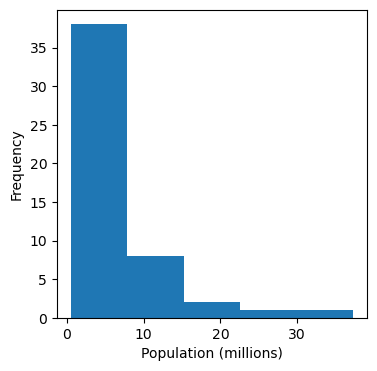

In [37]:
ax = (state['Population']/1000000).plot.hist(figsize=(4,4), bins=5)
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Population (millions)')

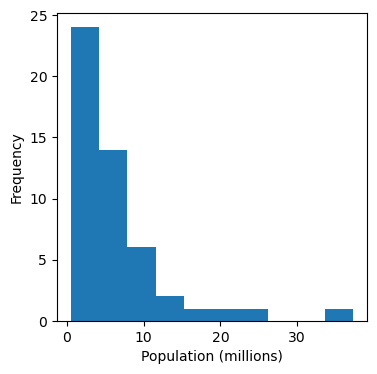

In [38]:
ax = (state['Population']/1000000).plot.hist(figsize=(4,4), bins=10)
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Population (millions)')

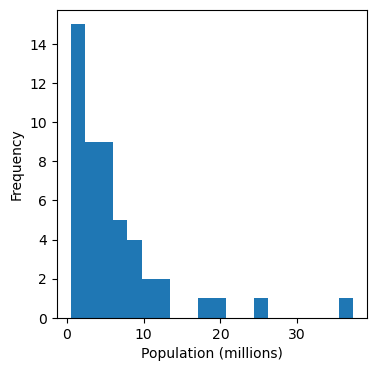

In [39]:
ax = (state['Population']/1000000).plot.hist(figsize=(4,4), bins=20)
ax.set_xlabel('Population (millions)')

In [40]:
state['Population'].max()

37253956

## Density plot

In [41]:
state['Murder.Rate'].describe()

count    50.000000
mean      4.066000
std       1.915736
min       0.900000
25%       2.425000
50%       4.000000
75%       5.550000
max      10.300000
Name: Murder.Rate, dtype: float64

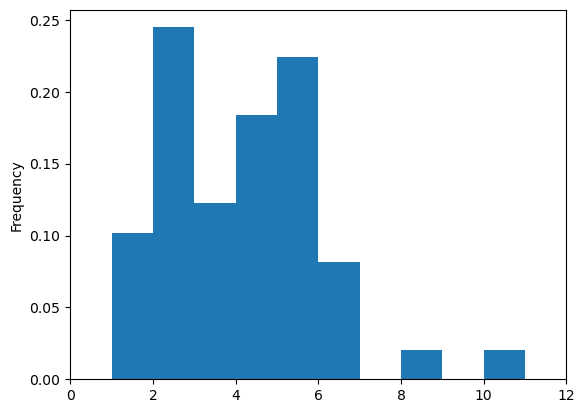

In [42]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))

- density = True: counts become counts/total, insteaf of raw counts --> similar to pdf
- for each bin, its height is the probability that data belongs to it

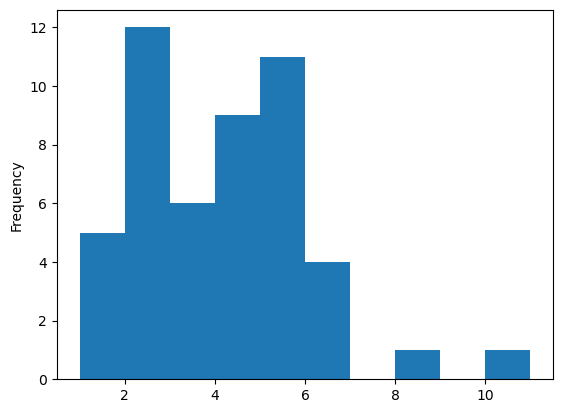

In [43]:
ax = state['Murder.Rate'].plot.hist(bins=range(1,12))

<Axes: ylabel='Density'>

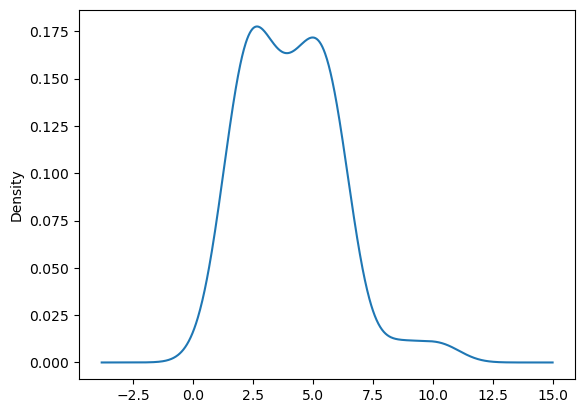

In [44]:
state['Murder.Rate'].plot.density()

Text(0.5, 0, 'Murder Rate (per 100,000)')

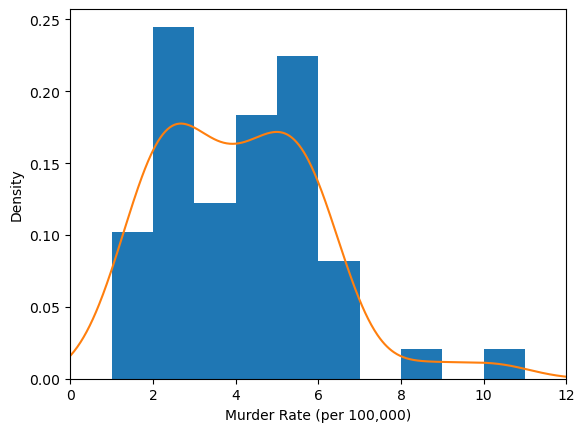

In [45]:
# on the same graph
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

## Binary and categorical data

In [46]:
dfw = pd.read_csv("dfw_airline.csv")

In [47]:
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


<Axes: >

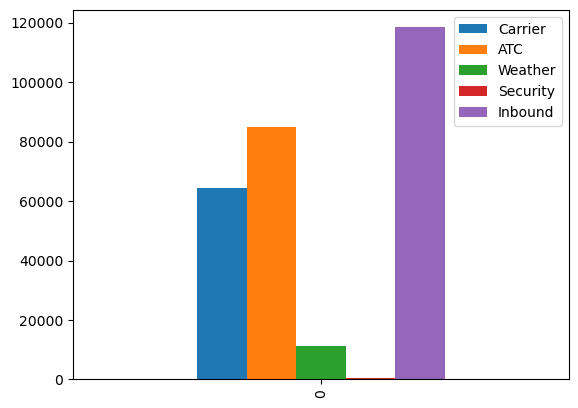

In [48]:
dfw.plot.bar()

In [49]:
dfw.transpose()

,0
Carrier,64263.16
ATC,84856.50
Weather,11235.42
Security,343.15
Inbound,118427.82


<Axes: >

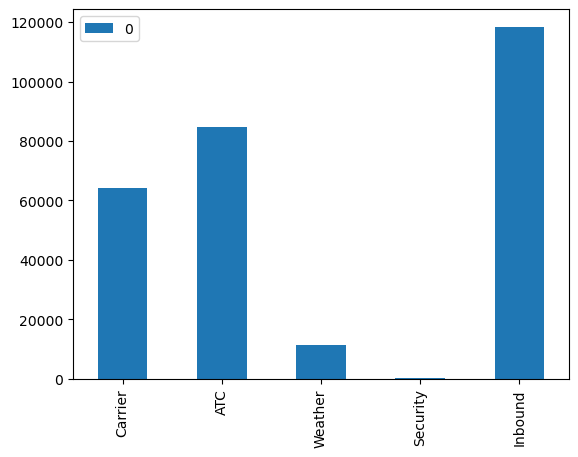

In [50]:
dfw.transpose().plot.bar()

Text(0, 0.5, 'Count')

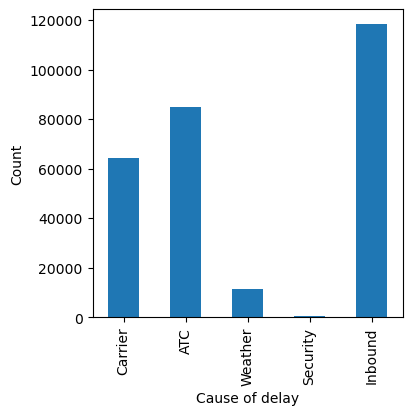

In [51]:
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

In [52]:
dfw.transpose().index

Index(['Carrier', 'ATC', 'Weather', 'Security', 'Inbound'], dtype='object')

In [53]:
dfw.transpose().columns

RangeIndex(start=0, stop=1, step=1)

## Correlation matrix

In [54]:
sp500_px = pd.read_csv('sp500_data.csv', index_col=0)
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [55]:
sp500_px.index

Index(['1993-01-29', '1993-02-01', '1993-02-02', '1993-02-03', '1993-02-04',
       '1993-02-05', '1993-02-08', '1993-02-09', '1993-02-10', '1993-02-11',
       ...
       '2015-06-18', '2015-06-19', '2015-06-22', '2015-06-23', '2015-06-24',
       '2015-06-25', '2015-06-26', '2015-06-29', '2015-06-30', '2015-07-01'],
      dtype='object', length=5647)

In [56]:
type(sp500_px.index[0])

str

In [57]:
'1993-01-29'<'2012-07-01'

True

In [58]:
sp500_sym = pd.read_csv('sp500_sectors.csv')
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [59]:
sp500_sym[sp500_sym['sector'] == 'etf']

,sector,sector_label,sub_sector,symbol
315,etf,EFTs,industrials,XLI
316,etf,EFTs,broad,QQQ
317,etf,EFTs,broad,SPY
318,etf,EFTs,broad,DIA
319,etf,EFTs,broad,GLD
320,etf,EFTs,broad,VXX
321,etf,EFTs,broad,USO
322,etf,EFTs,broad,IWM
323,etf,EFTs,energy,XLE
324,etf,EFTs,consumer_discretionary,XLY


In [60]:
sp500_sym[sp500_sym['sector'] == 'etf']['symbol']

315    XLI
316    QQQ
317    SPY
318    DIA
319    GLD
320    VXX
321    USO
322    IWM
323    XLE
324    XLY
325    XLU
326    XLB
327    XTL
328    XLV
329    XLP
330    XLF
331    XLK
Name: symbol, dtype: object

In [61]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
 sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
etfs

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.400000,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.520000,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.560000,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.800000,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.480000,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,-0.379997,-0.669998,-1.270004,-1.398679,0.010002,0.279999,-0.069999,-0.497896,-0.750000,-0.200005,-0.309997,-0.059997,-0.229999,0.189994,-0.279999,-0.220002,-0.330002
2015-06-26,-0.040001,-0.700004,-0.389999,-0.079926,0.360001,-0.020001,0.189999,-0.587512,0.259995,-0.010002,0.340000,-0.290001,-0.280002,-0.220001,0.029998,-0.030001,-0.330002
2015-06-29,-0.590000,-1.320000,-2.580002,-1.918189,0.260002,1.829999,-0.080000,-2.280327,-0.500000,-1.089996,-0.160000,-0.769996,-0.700001,-1.180000,-0.500000,-0.330000,-0.450000
2015-06-30,-0.480000,-0.419998,-1.369996,-1.168887,0.130005,0.889999,0.139999,-0.338568,-0.169998,-0.430001,-0.310001,-0.270001,0.259999,-0.510002,-0.580002,-0.150002,-0.269996


In [62]:
etfs.corr()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
XLI,1.000000,0.785865,0.888865,0.869680,0.056554,-0.468196,0.236881,0.782380,0.650054,0.798080,0.380809,0.784144,0.374000,0.663022,0.600424,0.787340,0.777773
QQQ,0.785865,1.000000,0.908995,0.834440,0.043553,-0.470555,0.199492,0.810158,0.560044,0.839701,0.346667,0.713463,0.421790,0.775392,0.614806,0.752771,0.945126
SPY,0.888865,0.908995,1.000000,0.953726,0.078722,-0.547074,0.272069,0.833937,0.713300,0.887028,0.481928,0.826053,0.406181,0.811269,0.744466,0.883616,0.886588
DIA,0.869680,0.834440,0.953726,1.000000,0.051523,-0.511327,0.256793,0.758012,0.658311,0.847043,0.463364,0.787415,0.383928,0.771044,0.753725,0.860556,0.842757
GLD,0.056554,0.043553,0.078722,0.051523,1.000000,-0.107488,0.216563,0.070110,0.188625,0.017467,0.121611,0.184366,-0.042233,-0.010200,0.033047,0.043039,0.053022
VXX,-0.468196,-0.470555,-0.547074,-0.511327,-0.107488,1.000000,-0.195397,-0.448942,-0.448474,-0.474756,-0.260395,-0.470890,-0.205661,-0.380925,-0.416913,-0.514365,-0.477258
USO,0.236881,0.199492,0.272069,0.256793,0.216563,-0.195397,1.000000,0.249799,0.525943,0.183275,0.113182,0.324166,0.078796,0.119500,0.116857,0.221760,0.225962
IWM,0.782380,0.810158,0.833937,0.758012,0.070110,-0.448942,0.249799,1.000000,0.586991,0.779750,0.325003,0.701533,0.387274,0.664288,0.537065,0.756282,0.760438
XLE,0.650054,0.560044,0.713300,0.658311,0.188625,-0.448474,0.525943,0.586991,1.000000,0.578956,0.337942,0.689778,0.260463,0.454457,0.413486,0.599129,0.559324
XLY,0.798080,0.839701,0.887028,0.847043,0.017467,-0.474756,0.183275,0.779750,0.578956,1.000000,0.366827,0.721232,0.370299,0.702860,0.663055,0.782053,0.772189


<Axes: >

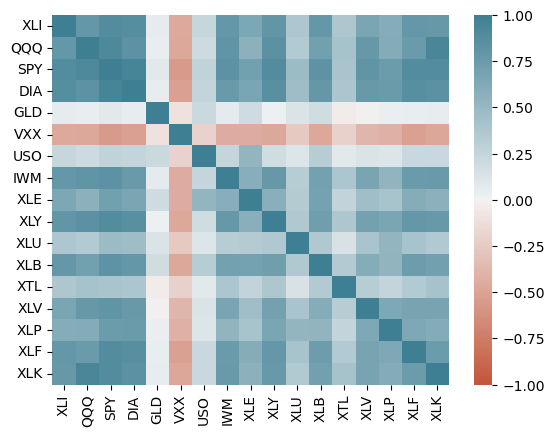

In [63]:
sns.heatmap(etfs.corr(), cmap=sns.diverging_palette(20, 220, as_cmap=True), vmin=-1, vmax=1)

<Axes: >

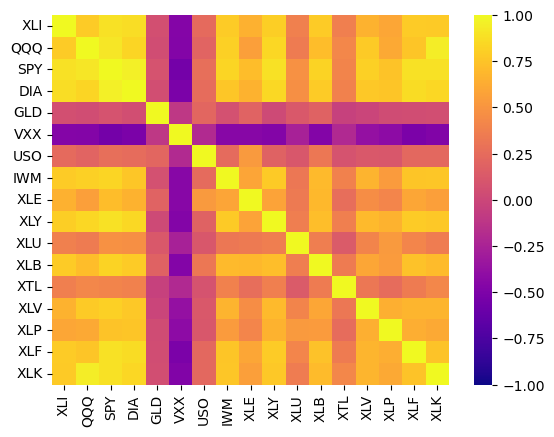

In [64]:
sns.heatmap(etfs.corr(), cmap='plasma', vmin=-1, vmax=1)

In [65]:
print(cm.datad.keys())

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'])


## Scatterplot

In [67]:
sp500_sym.columns

Index(['sector', 'sector_label', 'sub_sector', 'symbol'], dtype='object')

In [68]:
sp500_sym['symbol']

0       ADS
1        CA
2      MSFT
3       RHT
4      CTSH
       ... 
512    CELG
513    GILD
514    REGN
515    VRTX
516    HSIC
Name: symbol, Length: 517, dtype: object

In [71]:
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', sp500_sym['symbol']]
telecom.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
2012-07-02,1.190002,-0.224999,-0.055103,-0.560002,-0.455000,-0.104774,-0.279545,-0.495967,-0.018692,-0.152205,...,-0.970001,3.830002,1.257135,0.0,2.110001,0.105000,0.219207,5.610000,-0.539997,-0.189994
2012-07-03,0.440002,0.125998,0.486724,0.849998,0.165001,0.219071,0.308464,0.439807,0.093461,0.409055,...,1.090004,-0.510002,1.058641,0.0,0.100006,0.440002,0.274009,1.300003,-0.170002,0.519997
2012-07-05,-0.369995,-0.116998,0.101019,0.459999,0.395001,-0.038100,-0.269906,0.383662,0.186922,-0.475645,...,0.690003,-0.489998,0.255211,0.0,-0.600006,-0.175003,-0.283971,-0.630005,0.000000,0.369995
2012-07-06,0.319992,-0.476996,-0.385706,-2.159999,-0.920000,-0.523868,-0.279546,-2.348823,0.074769,-0.742004,...,-1.330001,-1.980003,-0.396989,0.0,-1.569992,-0.170002,-0.254081,-0.659996,-0.869999,-0.970002
2012-07-09,-0.070007,-0.152999,-0.110203,-1.880001,-0.139999,-0.114299,-0.279544,-1.020006,-0.084115,-0.494672,...,-1.029999,-0.599999,0.680554,0.0,0.220002,0.069999,0.194296,-2.349998,-1.310002,-0.350006


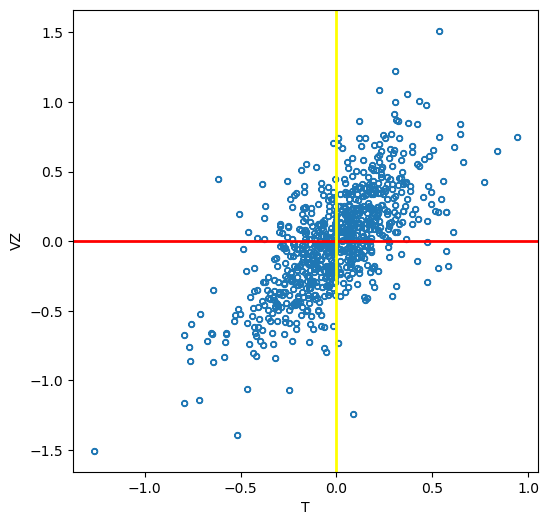

In [84]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(6,6), marker="$\u25EF$")
ax.set_xlabel('T')
ax.set_ylabel('VZ')
ax.axhline(y=0, color='red', lw=2)
ax.axvline(x=0, color='yellow', lw=2)